In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])

In [2]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

modelo = DecisionTreeClassifier()
resultado = cross_val_score(modelo, X, y, cv=skfold)

print(resultado.mean())

0.9600000000000002


In [ ]:
%pip install graphviz

In [34]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
arquivo = "./exemplo.dot"

export_graphviz(modelo.fit(X,y), out_file=arquivo, feature_names=iris.feature_names)

with open(arquivo) as aberto:
    grafico_dot = aberto.read()

grafico = graphviz.Source(grafico_dot)
grafico

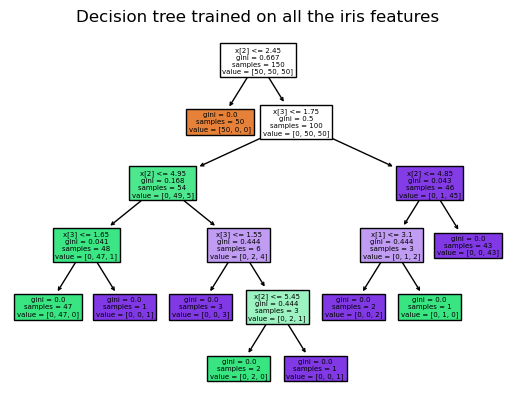

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [40]:
import numpy as np
from sklearn.model_selection import GridSearchCV

minimos_split = np.array([2, 3, 4, 5, 6, 7, 8])
maximo_nivel = np.array([3, 4, 5, 6])
algoritmo = ['gini', 'entropy']
valores_grid = {'min_samples_split': minimos_split, 'max_depth': maximo_nivel, 'criterion': algoritmo}

modelo = DecisionTreeClassifier()

gridDecisionTree = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5)
gridDecisionTree.fit(X, y)

print("Acurácia: ", gridDecisionTree.best_score_)
print("Parâmetros: ", gridDecisionTree.best_params_)

Acurácia:  0.9733333333333334
Parâmetros:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 6}
